In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


# Part 1:

## Analyzing Best-Seller Trends Across Product Categories

### 1.1 Crosstab Analysis

In [4]:
# Create a crosstab between the product category and the isBestSeller status.

crosstab_best_cat = pd.crosstab(df['category'], df['isBestSeller'])

crosstab_best_cat = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the percentage of True values
crosstab_best_cat['True%'] = (crosstab_best_cat[True] / (crosstab_best_cat[True] + crosstab_best_cat[False])) * 100

# Sort the crosstab by True percentage in descending order
sorted_crosstab = crosstab_best_cat.sort_values(by='True%', ascending=False)

In [5]:
sorted_crosstab.head(10)

isBestSeller,False,True,True%
category,,,
Grocery,9008,556,5.813467
Smart Home Security & Lighting,98,6,5.769231
Health & Personal Care,9017,552,5.768628
Mobile Phone Accessories,248,11,4.247104
Power & Hand Tools,8353,306,3.533895
"Billiard, Snooker & Pool",241,8,3.212851
Pet Supplies,9152,285,3.020028
Home Brewing & Wine Making,239,7,2.845528
Wind Instruments,243,7,2.800000


### 1.2 Statistical Test:

In [7]:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Display the results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p:.2e}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 36540.20
P-value: 0.00e+00
Degrees of freedom: 295
Expected frequencies table:
[[2.47190130e+02 8.09870149e-01]
 [4.05371878e+03 1.32812173e+01]
 [2.49183599e+02 8.16401360e-01]
 [1.69145827e+03 5.54173243e+00]
 [2.53170536e+02 8.29463782e-01]
 [8.50214439e+03 2.78556144e+01]
 [1.06650580e+02 3.49419782e-01]
 [2.57157474e+02 8.42526204e-01]
 [9.51781673e+03 3.11832664e+01]
 [1.50008526e+04 4.91473619e+01]
 [9.32544700e+03 3.05530045e+01]
 [2.38219520e+02 7.80479700e-01]
 [3.22941944e+03 1.05805616e+01]
 [9.44704859e+03 3.09514084e+01]
 [6.68808779e+03 2.19122125e+01]
 [5.26275760e+02 1.72423967e+00]
 [1.90296531e+04 6.23469391e+01]
 [2.77191835e+03 9.08164873e+00]
 [2.53170536e+02 8.29463782e-01]
 [4.04674164e+02 1.32583581e+00]
 [1.92489346e+04 6.30653723e+01]
 [3.10482764e+03 1.01723609e+01]
 [2.04330551e+02 6.69449115e-01]
 [6.28839730e+03 2.06027047e+01]
 [5.23385231e+03 1.71476942e+01]
 [9.52180367e+03 3.11963288e+01]
 [2.48186864e+02 8.13135755e-01]
 [9.4659

In [8]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.

crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Performing the Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab)

# Calculate Cramér's V
n = crosstab.sum().sum()
min_dim = min(crosstab.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Display the results
print(f"Cramér's V: {cramers_v:.2f}")

Cramér's V: 0.12


### 1.3 Visualizations:

<Figure size 1400x800 with 0 Axes>

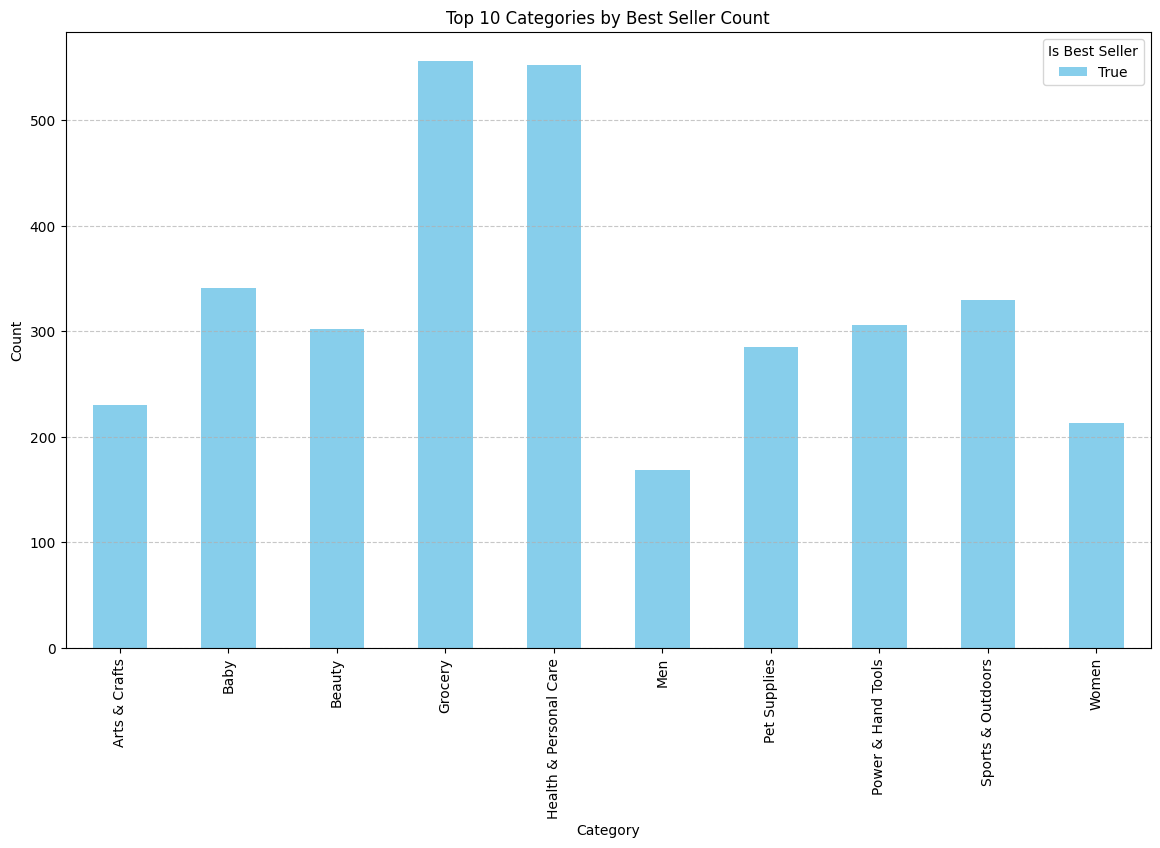

In [12]:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

# Filter the DataFrame to include only best sellers
best_sellers = df[df['isBestSeller'] == True]

# Get the count of best sellers for each category
category_counts = best_sellers['category'].value_counts()

# Select the top 10 categories
top_10_categories = category_counts.head(10)

# Filter the original DataFrame to include only rows from the top 10 categories
top_10_best_sellers = best_sellers[best_sellers['category'].isin(top_10_categories.index)]

# Create a crosstab of categories and best seller status
crosstab = pd.crosstab(top_10_best_sellers['category'], top_10_best_sellers['isBestSeller'])

# Plotting the bar chart
plt.figure(figsize=(14, 8))
crosstab.plot(kind='bar', stacked=True, color=['skyblue'], figsize=(14, 8))

# Adding title and labels
plt.title('Top 10 Categories by Best Seller Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Is Best Seller')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Part 2:

## Exploring Product Prices and Ratings Across Categories and Brands

### 2.0 Preliminary Step: Remove outliers in product prices.

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

### 2.1 Violin Plots:

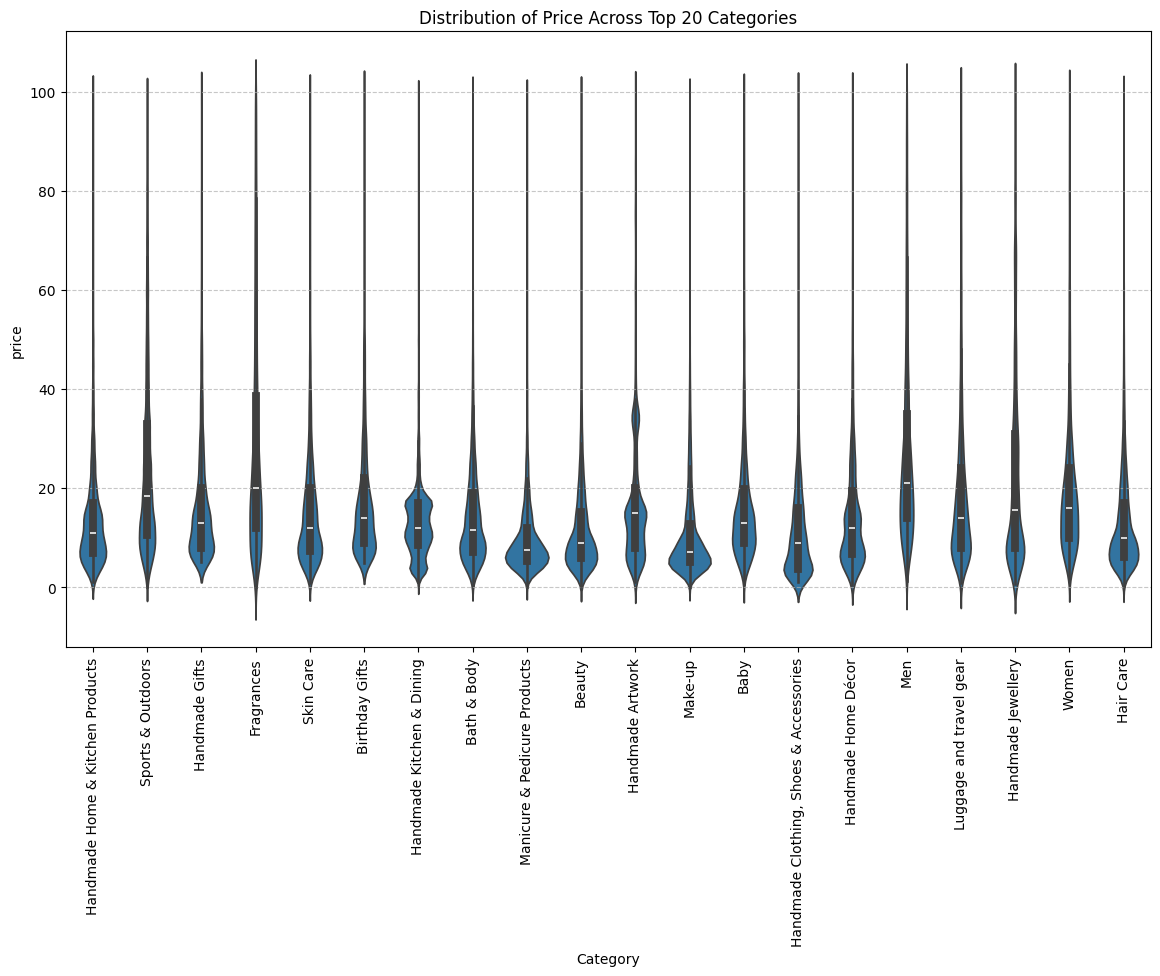

In [20]:
# Use a violin plot to visualize the distribution of price across different product categories.

# Get the top 20 categories based on count
top_20_categories = df_no_outliers['category'].value_counts().head(20).index

# Filter the DataFrame to include only the top 20 categories
filtered_df = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Create the violin plot
plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=filtered_df)

# Adding title and labels
plt.title('Distribution of Price Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


2.2 Bar Charts:

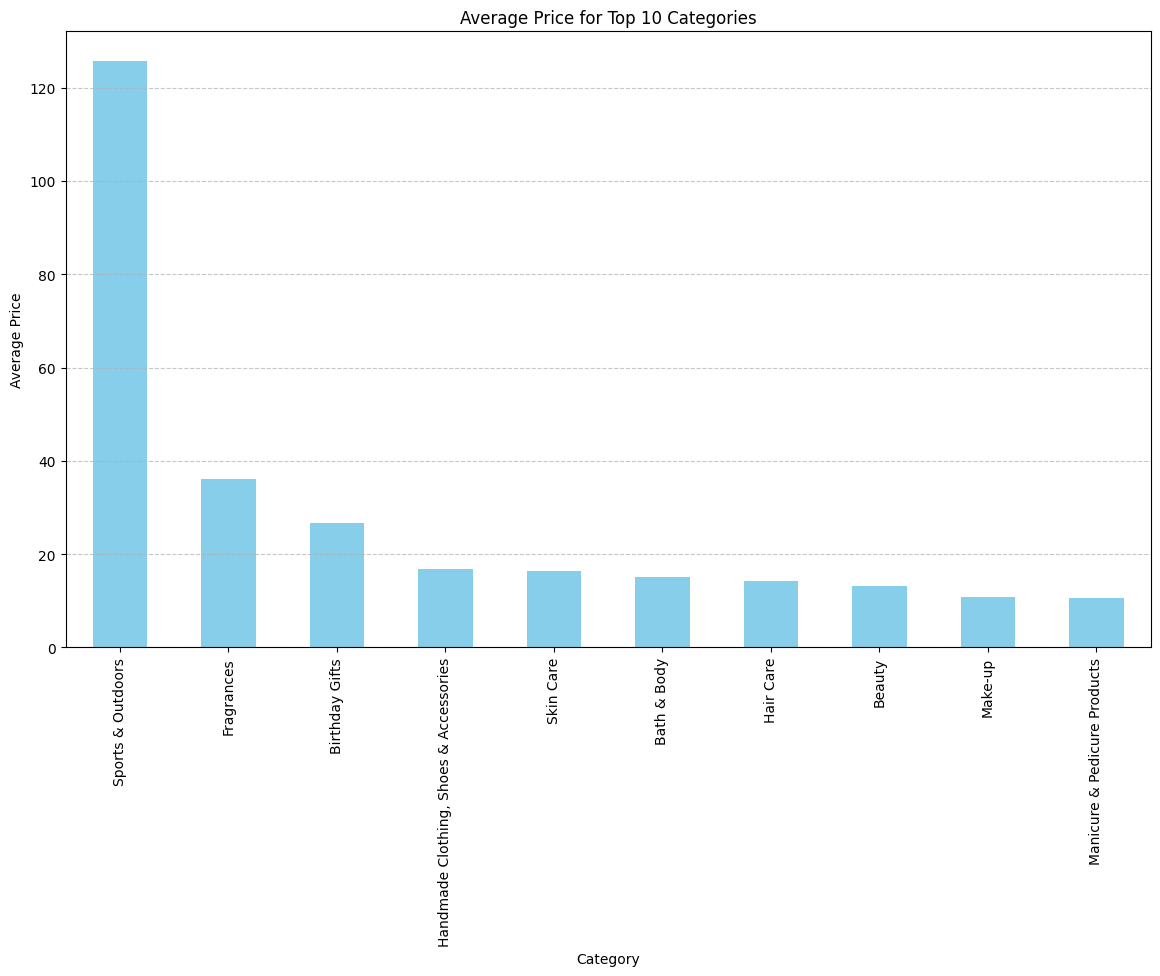

In [21]:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

# Get the top 10 categories based on count
top_10_categories = df['category'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
filtered_df = df[df['category'].isin(top_10_categories)]

# Calculate the average price for each of the top 10 categories
avg_price_per_category = filtered_df.groupby('category')['price'].mean().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(14, 8))
avg_price_per_category.plot(kind='bar', color='skyblue')

# Adding title and labels
plt.title('Average Price for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

### 2.3 Box Plots:

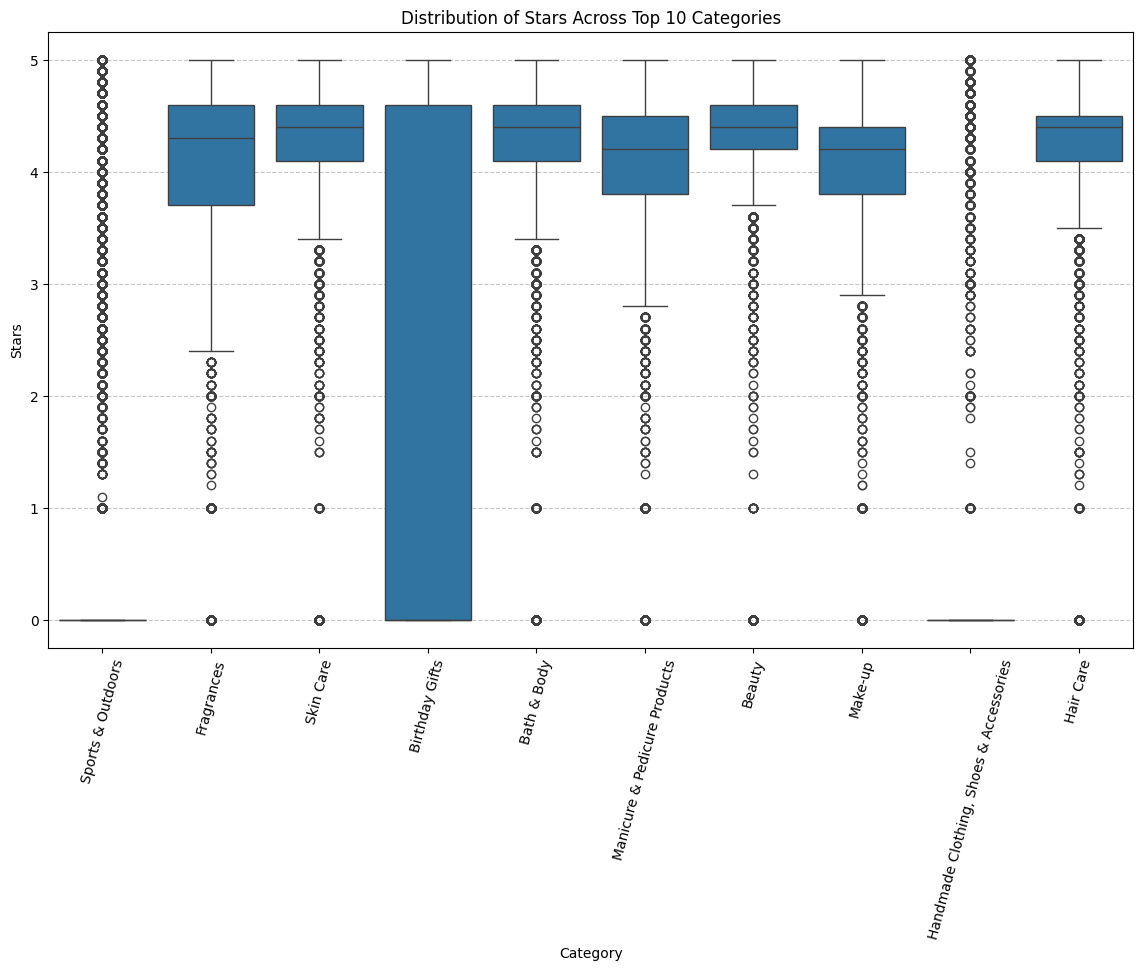

In [23]:
# Visualize the distribution of product ratings based on their category using side-by-side box plots.

# Get the top 10 categories based on count
top_10_categories = df['category'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
filtered_df = df[df['category'].isin(top_10_categories)]

# Create the box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=filtered_df)

# Adding title and labels
plt.title('Distribution of Stars Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.xticks(rotation=75)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

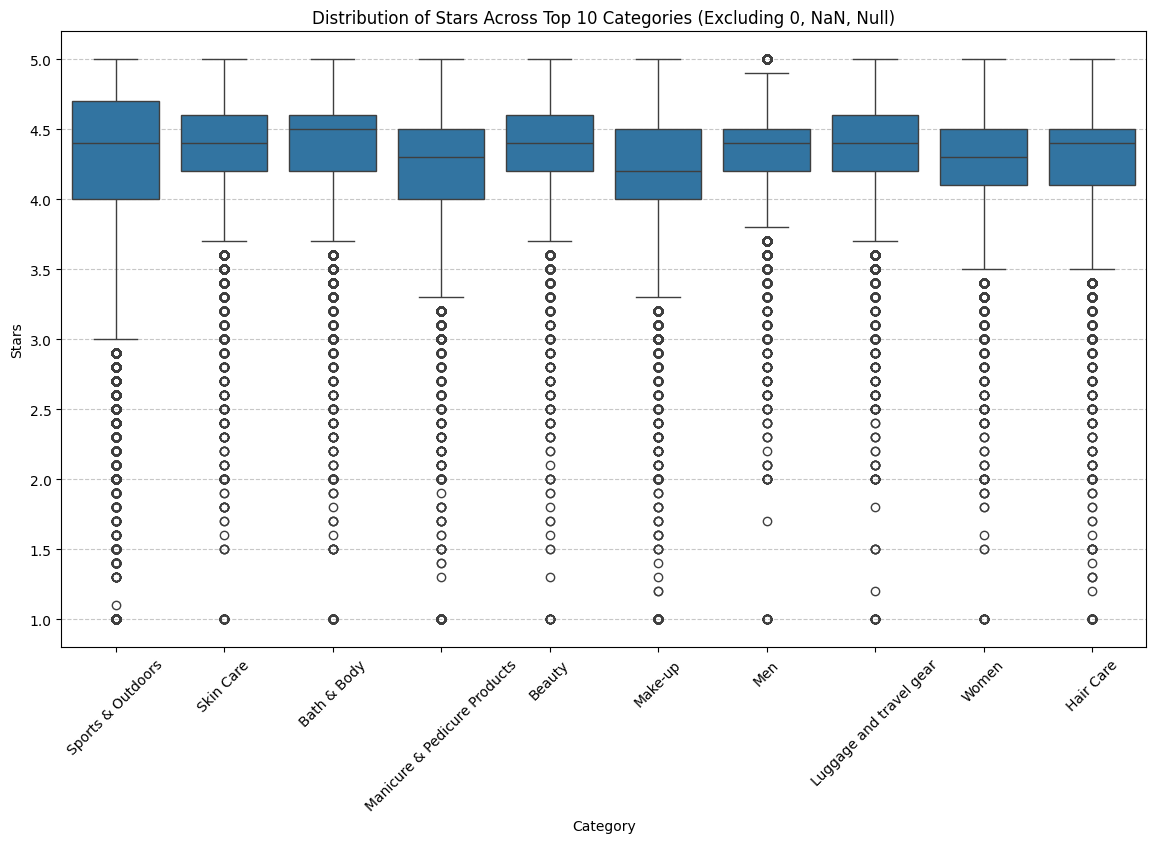

In [24]:


# Exclude rows where 'stars' column has values 0, NaN, or Null
df_stars = df[df['stars'] != 0].dropna(subset=['stars'])

# Get the top 10 categories based on count
top_10_categories = df_stars['category'].value_counts().head(10).index

# Filter the DataFrame to include only the top 10 categories
filtered_df = df_stars[df_stars['category'].isin(top_10_categories)]

# Create the box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=filtered_df)

# Adding title and labels
plt.title('Distribution of Stars Across Top 10 Categories (Excluding 0, NaN, Null)')
plt.xlabel('Category')
plt.ylabel('Stars')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# Part 3:

## Investigating the Interplay Between Product Prices and Ratings

### 3.1 Correlation Coefficients:

In [26]:
# Calculate the correlation coefficient between price and stars.

# Calculate the correlation coefficient between 'Price' and 'stars'
correlation = df['price'].corr(df['stars'])
correlation

-0.12490673262148386

### 3.2 Visualizations:

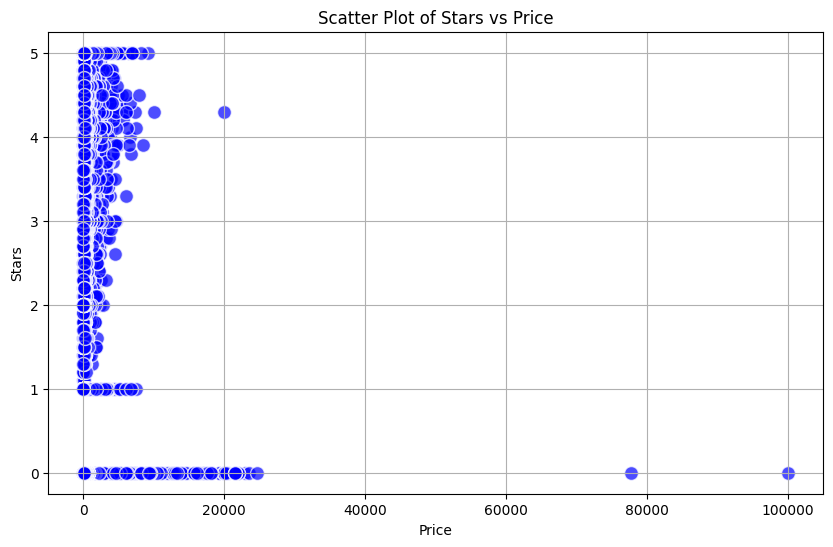

In [28]:
# Use a scatter plot to visualize the relationship between product rating and price.

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['stars'], alpha=0.7, c='blue', edgecolors='w', s=100)

# Adding title and labels
plt.title('Scatter Plot of Stars vs Price')
plt.xlabel('Price')
plt.ylabel('Stars')
plt.grid(True)

# Display the plot
plt.show()

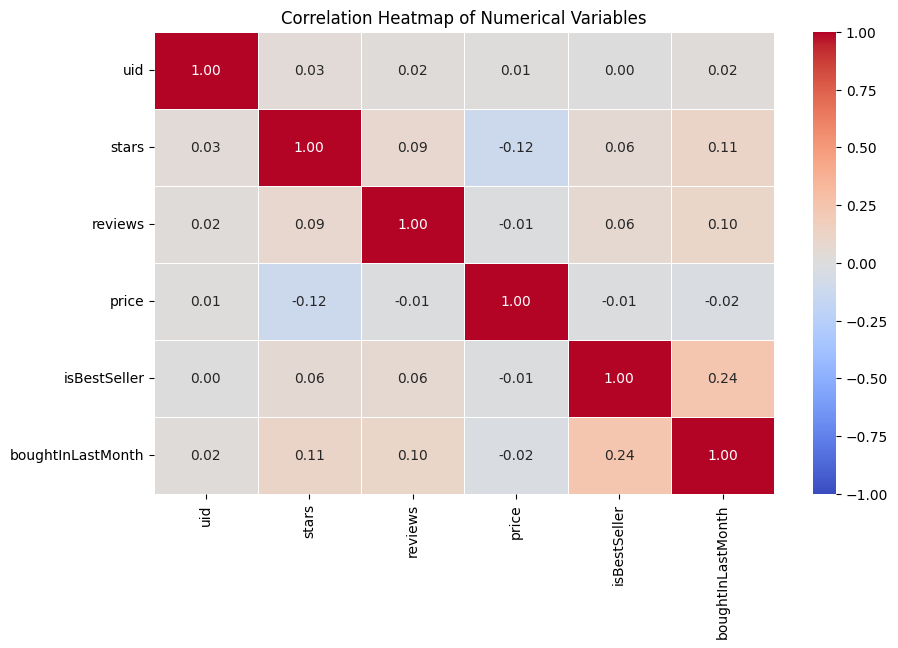

In [30]:
# Use a correlation heatmap to visualize correlations between all numerical variables.

# Convert boolean column to numerical (optional, but often useful)
df['isBestSeller'] = df['isBestSeller'].astype(int)

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adding title
plt.title('Correlation Heatmap of Numerical Variables')

# Display the plot
plt.show()

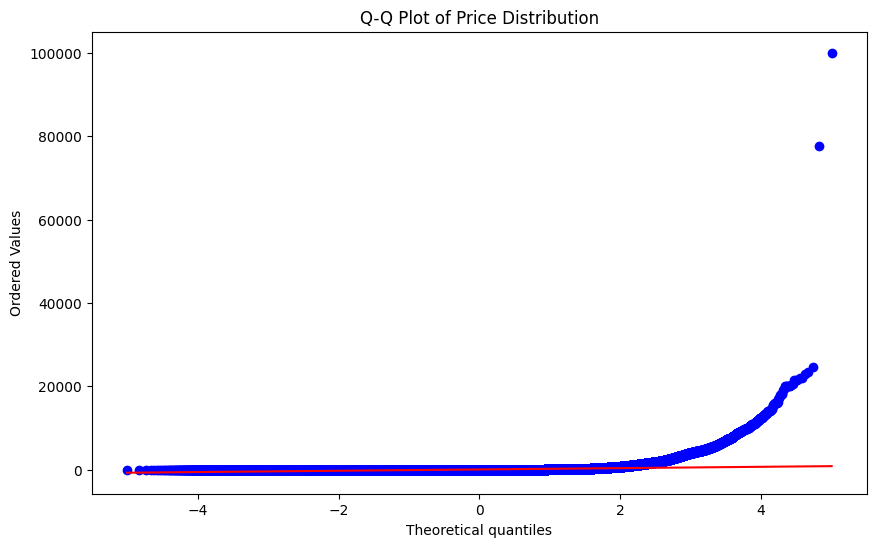

In [32]:
# Extract the "Price" column
prices = df['price']

# Create the Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(prices, dist="norm", plot=plt)

# Adding title
plt.title('Q-Q Plot of Price Distribution')

# Display the plot
plt.show()

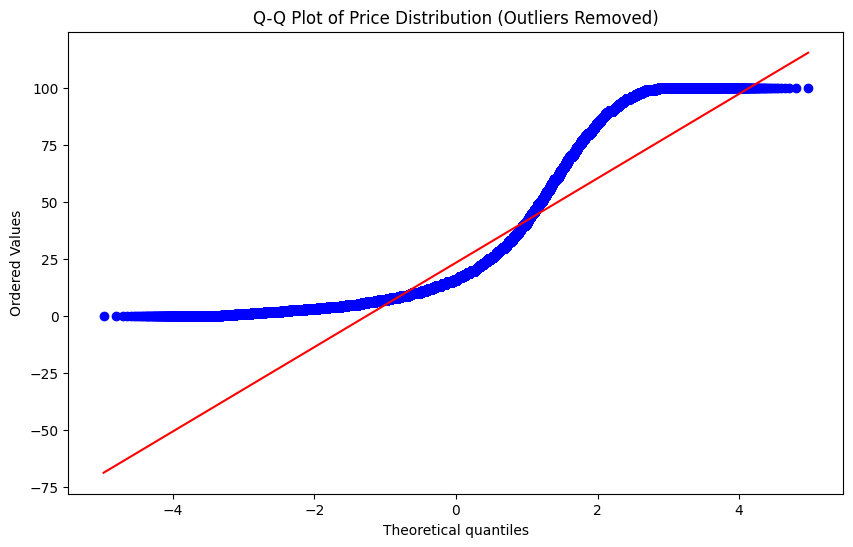

In [33]:
# Extract the "Price" column
prices = df['price']

# Calculate IQR
Q1 = np.percentile(prices, 25)
Q3 = np.percentile(prices, 75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
prices_filtered = prices[(prices >= lower_bound) & (prices <= upper_bound)]

# Create the Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(prices_filtered, dist="norm", plot=plt)

# Adding title
plt.title('Q-Q Plot of Price Distribution (Outliers Removed)')

# Display the plot
plt.show()